In [5]:
#imports
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pycaret import *
from pycaret.classification import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (classification_report)
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
dados = pd.read_csv('Dataset_cliente.csv')
dados.head()

,Unnamed: 0,ID,Nome,CPF,Cliente_ID,Produto,Categoria,Data_Compra,Valor_Compra,Quantidade_Parcelas,...,Gastos_Mensais,Salario,Tipo_Cartao_Credito,Gasto_Mensal_Cartao,Viaja_Frequentemente,Profissao,Renda_Mensal,Dependentes,Gênero,Data_Nascimento
0,0,1,Carlos Silva,012.345.678-90,5721,Smartphone Samsung Galaxy S21,Eletrônicos,2024-07-15,4299.90,1,...,2000,5000,Platinum,3000,1,Engenheiro,5000,2,Masculino,1989-03-12
1,1,2,Ana Maria Souza,987.654.321-00,4125,Fogão 4 Bocas,Eletrodomésticos,2024-06-12,1349.99,1,...,1800,4000,Gold,1500,0,Professora,4000,1,Feminino,1992-06-25
2,2,3,Fernando Alves,123.456.789-01,2890,Churrasqueira Elétrica Mondial,Eletroportáteis,2024-05-20,749.99,1,...,2200,4500,Gold,1200,0,Advogado,4500,3,Masculino,1985-11-05
3,3,4,Juliana Castro,234.567.890-12,4956,Notebook Dell Inspiron,Eletrônicos,2024-08-11,3999.90,1,...,2500,6000,Platinum,4000,1,Designer,6000,0,Feminino,1990-01-19
4,4,5,Pedro Lima,345.678.901-23,6743,Cama Box Casal,Móveis,2024-04-25,1899.50,1,...,1500,3500,Silver,800,0,Vendedor,3500,2,Masculino,1993-12-07


In [7]:
# colunas_selecionadas = dados[['Interresses3', 'Interesses2', 'Interesses']]  
# dados['Interesses'] = colunas_selecionadas.apply(lambda row: [row["Interresses3"], row["Interesses2"], row["Interesses"]], axis=1)
# dados = dados.drop(['Interresses3', 'Interesses2'], axis=1)
# dados.to_csv("Dataset_cliente.csv")

In [8]:
# dados['Viaja_Frequentemente'] = dados['Viaja_Frequentemente'].replace({"Sim": 1, "Não": 0})
# dados['Dependentes'] = dados['Dependentes'].replace({"1\"": 1, "0\"": 0, "2\"": 2, "3\"": 3})
# dados.to_csv("Dataset_cliente.csv")

In [9]:
def verificar_idade(idade):
    if 18 <= idade <=29:
        return "Plano Conexão"
    elif 30 <= idade < 50:
        return "Plano Serenidade"
    else:
        return "Plano Equilíbrio"

dados['Data_Nascimento'] = pd.to_datetime(dados['Data_Nascimento'])
dados['Idade'] = datetime.date.today().year - dados['Data_Nascimento'].dt.year
dados['Plano'] = dados['Idade'].apply(verificar_idade)

# Retornar o DataFrame resultante
dados[['Idade', 'Plano']]

# Exemplo de uso
# df_resultante = verificar_idade_csv('caminho/para/seu_arquivo.csv')
# print(df_resultante)


,Idade,Plano
0,35,Plano Serenidade
1,32,Plano Serenidade
2,39,Plano Serenidade
3,34,Plano Serenidade
4,31,Plano Serenidade
...,...,...
71,32,Plano Serenidade
72,36,Plano Serenidade
73,34,Plano Serenidade
74,31,Plano Serenidade


In [10]:
especificacao = dados[['Interesses', 'Gastos_Mensais', 'Salario',
       'Tipo_Cartao_Credito', 'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
       'Profissao', 'Renda_Mensal', 'Dependentes', 'Idade', 'Plano']]
especificacao.head(5)

,Interesses,Gastos_Mensais,Salario,Tipo_Cartao_Credito,Gasto_Mensal_Cartao,Viaja_Frequentemente,Profissao,Renda_Mensal,Dependentes,Idade,Plano
0,"['Tecnologia', 'Esportes', 'Viagens']",2000,5000,Platinum,3000,1,Engenheiro,5000,2,35,Plano Serenidade
1,"['Culinária', 'Literatura', 'Decoração']",1800,4000,Gold,1500,0,Professora,4000,1,32,Plano Serenidade
2,"['Esportes', 'Viagens', 'Decoração']",2200,4500,Gold,1200,0,Advogado,4500,3,39,Plano Serenidade
3,"['Viagens', 'Design', 'Tecnologia']",2500,6000,Platinum,4000,1,Designer,6000,0,34,Plano Serenidade
4,"['Decoração', 'Música', 'Esportes']",1500,3500,Silver,800,0,Vendedor,3500,2,31,Plano Serenidade


In [11]:
def defineplano(interesses):
    if 'tecnologia' in interesses or 'Viagens' in interesses or 'Games' in interesses:
        return "Plano Conexão"
    elif 'Design' in interesses or 'Culinária' in interesses or 'Nutrição' in interesses:
        return "Plano Serenidade"
    else:
        return "Plano Equilíbrio"

# dados['Data_Nascimento'] = pd.to_datetime(dados['Data_Nascimento'])
# dados['Idade'] = datetime.date.today().year - dados['Data_Nascimento'].dt.year
dados['Plano'] = dados['Interesses'].apply(defineplano)
dados[['Interesses', 'Plano']]

,Interesses,Plano
0,"['Tecnologia', 'Esportes', 'Viagens']",Plano Conexão
1,"['Culinária', 'Literatura', 'Decoração']",Plano Serenidade
2,"['Esportes', 'Viagens', 'Decoração']",Plano Conexão
3,"['Viagens', 'Design', 'Tecnologia']",Plano Conexão
4,"['Decoração', 'Música', 'Esportes']",Plano Equilíbrio
...,...,...
71,"['Culinária', 'Café', 'Filmes']",Plano Serenidade
72,"['Decoração', 'Esportes', 'Fitness']",Plano Equilíbrio
73,"['Tecnologia', 'Games', 'Viagens']",Plano Conexão
74,"['Tecnologia', 'Fitness', 'Viagens']",Plano Conexão


In [12]:
dados.head()

,Unnamed: 0,ID,Nome,CPF,Cliente_ID,Produto,Categoria,Data_Compra,Valor_Compra,Quantidade_Parcelas,...,Tipo_Cartao_Credito,Gasto_Mensal_Cartao,Viaja_Frequentemente,Profissao,Renda_Mensal,Dependentes,Gênero,Data_Nascimento,Idade,Plano
0,0,1,Carlos Silva,012.345.678-90,5721,Smartphone Samsung Galaxy S21,Eletrônicos,2024-07-15,4299.90,1,...,Platinum,3000,1,Engenheiro,5000,2,Masculino,1989-03-12,35,Plano Conexão
1,1,2,Ana Maria Souza,987.654.321-00,4125,Fogão 4 Bocas,Eletrodomésticos,2024-06-12,1349.99,1,...,Gold,1500,0,Professora,4000,1,Feminino,1992-06-25,32,Plano Serenidade
2,2,3,Fernando Alves,123.456.789-01,2890,Churrasqueira Elétrica Mondial,Eletroportáteis,2024-05-20,749.99,1,...,Gold,1200,0,Advogado,4500,3,Masculino,1985-11-05,39,Plano Conexão
3,3,4,Juliana Castro,234.567.890-12,4956,Notebook Dell Inspiron,Eletrônicos,2024-08-11,3999.90,1,...,Platinum,4000,1,Designer,6000,0,Feminino,1990-01-19,34,Plano Conexão
4,4,5,Pedro Lima,345.678.901-23,6743,Cama Box Casal,Móveis,2024-04-25,1899.50,1,...,Silver,800,0,Vendedor,3500,2,Masculino,1993-12-07,31,Plano Equilíbrio


In [13]:
e = especificacao[['Gastos_Mensais', 'Salario','Gasto_Mensal_Cartao', 'Viaja_Frequentemente','Renda_Mensal', 'Dependentes']]
#e['Viaja_Frequentemente'] = e['Viaja_Frequentemente'].str.replace("Sim", 1, case=False, regex=False)
#e['Dependentes'] = e['Dependentes'].str.replace("0\"", "0", case=False, regex=False)
e['Viaja_Frequentemente'] = e['Viaja_Frequentemente'].replace({"Sim": 1, "Não": 0})
e['Dependentes'] = e['Dependentes'].replace({"1\"": 1, "0\"": 0, "2\"": 2, "3\"": 3})
e.head()

,Gastos_Mensais,Salario,Gasto_Mensal_Cartao,Viaja_Frequentemente,Renda_Mensal,Dependentes
0,2000,5000,3000,1,5000,2
1,1800,4000,1500,0,4000,1
2,2200,4500,1200,0,4500,3
3,2500,6000,4000,1,6000,0
4,1500,3500,800,0,3500,2


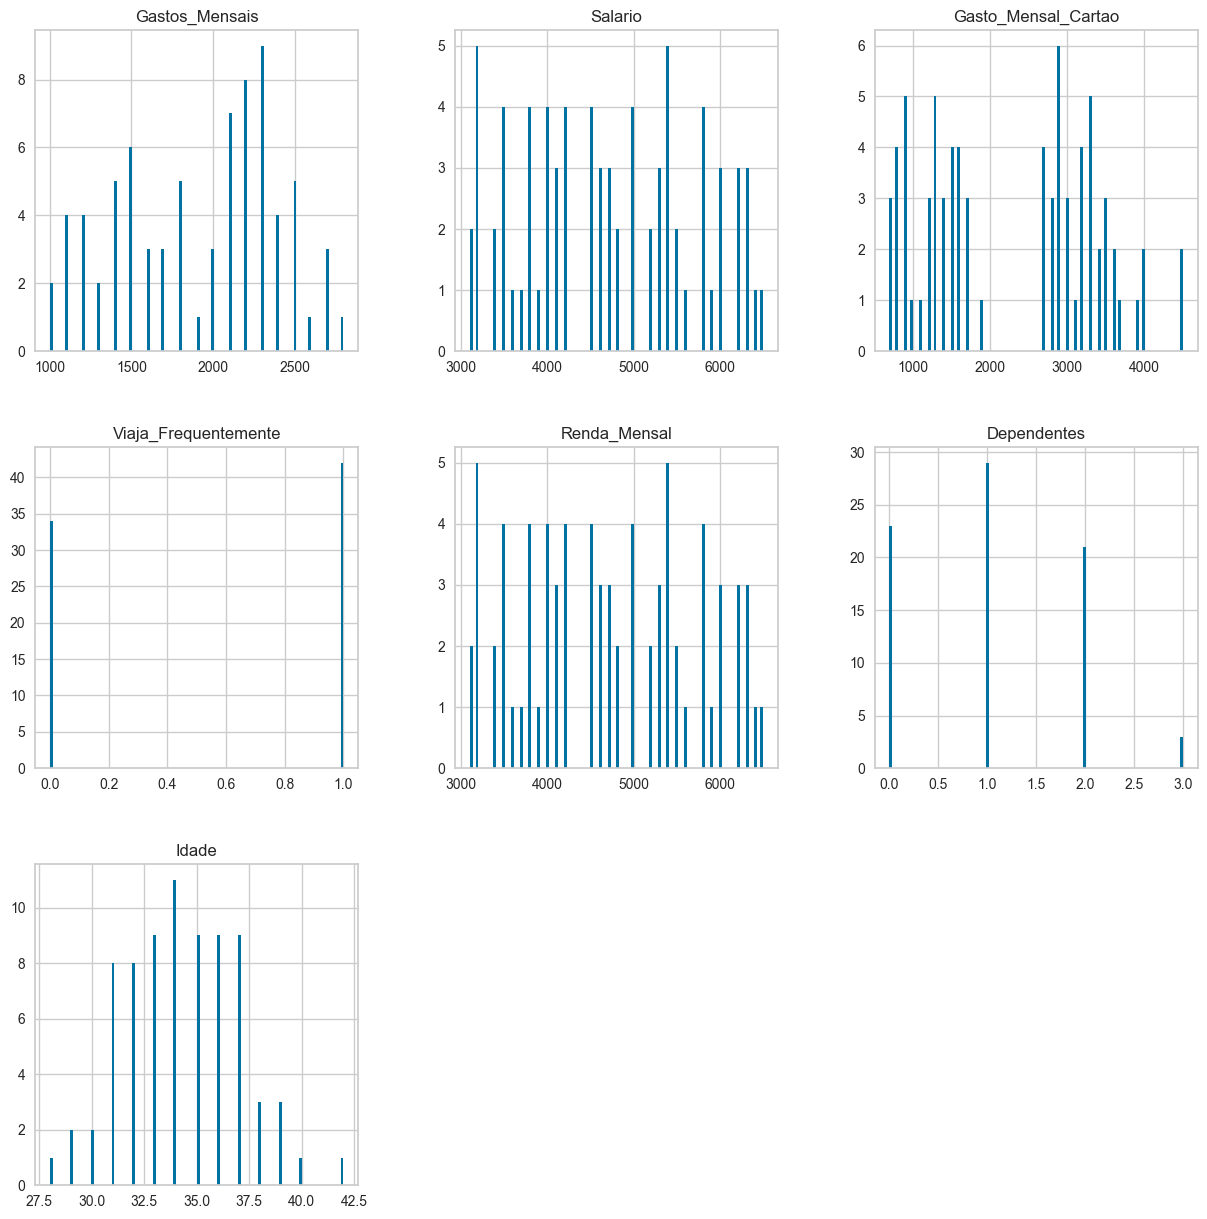

In [14]:
especificacao.hist(bins=100, figsize=(15, 15))
plt.show()

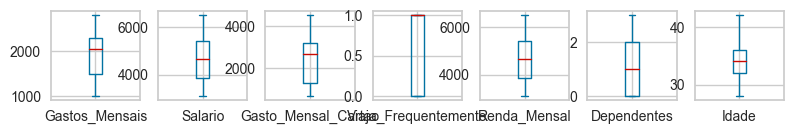

In [15]:
especificacao.plot(kind='box', subplots=True, layout=(len(especificacao.columns),len(especificacao.columns)), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

In [16]:
entradas = especificacao[['Gastos_Mensais', 'Salario',
       'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
       'Renda_Mensal', 'Dependentes', 'Idade']]
classes = especificacao['Plano']

In [46]:
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (60, 7) e teste (16, 7)


In [47]:
classes_treino.head()

75       Plano Conexão
30    Plano Equilíbrio
36    Plano Equilíbrio
23       Plano Conexão
61    Plano Equilíbrio
Name: Plano, dtype: object

In [48]:
entradas_treino.head()

,Gastos_Mensais,Salario,Gasto_Mensal_Cartao,Viaja_Frequentemente,Renda_Mensal,Dependentes,Idade
75,1500,4000,1400,1,4000,1,34
30,1200,3400,900,0,3400,1,28
36,2300,5900,3300,1,5900,0,33
23,2700,6300,4500,1,6300,2,33
61,1800,4600,1700,0,4600,0,31


In [49]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 12
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=12)

In [50]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Plano Equilíbrio' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Equilíbrio' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Equilíbrio' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Equilíbrio' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Equilíbrio' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Equilíbrio']


In [51]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.8125


In [52]:
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

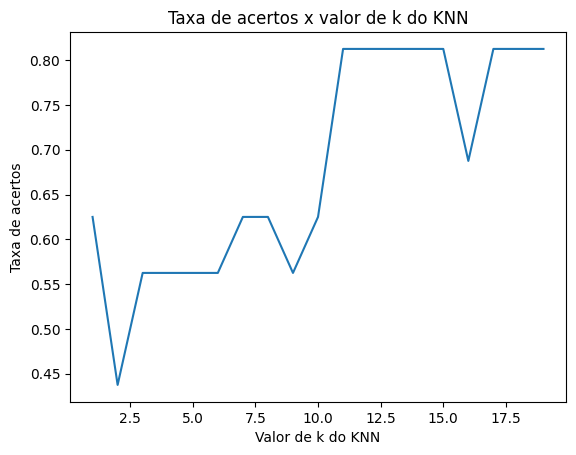

In [53]:
k_range = list(range(1,20))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


In [17]:
dados = pd.read_csv("Dataset_cliente.csv")
X = entradas
y = classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lda_model = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
lda_model.fit(X_train, y_train)


scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")

Cross-validation scores: [0.9375     1.         1.         0.93333333 0.93333333]
Mean cross-validation score: 0.9608333333333334


In [18]:
y_pred = lda_model.predict(X_test)
print("Relatório de Classificação para LDA:")
print(classification_report(y_test, y_pred))

Relatório de Classificação para LDA:
                  precision    recall  f1-score   support

   Plano Conexão       0.00      0.00      0.00         3
Plano Serenidade       0.92      1.00      0.96        35

        accuracy                           0.92        38
       macro avg       0.46      0.50      0.48        38
    weighted avg       0.85      0.92      0.88        38



In [19]:
clf1 = setup(data=especificacao, target='Plano', session_id=123)
save_model(lda_model, 'Modelo_LDA')

,Description,Value
0,Session id,123
1,Target,Plano
2,Target type,Binary
3,Target mapping,"Plano Conexão: 0, Plano Serenidade: 1"
4,Original data shape,"(76, 11)"
5,Transformed data shape,"(76, 13)"
6,Transformed train set shape,"(53, 13)"
7,Transformed test set shape,"(23, 13)"
8,Numeric features,7
9,Categorical features,3


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gastos_Mensais', 'Salario',
                                              'Gasto_Mensal_Cartao',
                                              'Viaja_Frequentemente',
                                              'Renda_Mensal', 'Dependentes',
                                              'Idade'],
                                     transformer=SimpleImputer(add_...
                                     transformer=TargetEncoder(cols=['Interesses',
                                                                     'Profissao'],
                                                               drop_invariant=False,
           

In [20]:
from pycaret.classification import *

# Supondo que `data_clean` seja o seu DataFrame e 'target_default' a variável alvo
clf1 = setup(data=especificacao, target='Plano', session_id=123)

# Compara modelos e seleciona o melhor
best_model = compare_models()

# Salve o melhor modelo encontrado
save_model(best_model, 'modelo_melhor_salvo')

,Description,Value
0,Session id,123
1,Target,Plano
2,Target type,Binary
3,Target mapping,"Plano Conexão: 0, Plano Serenidade: 1"
4,Original data shape,"(76, 11)"
5,Transformed data shape,"(76, 13)"
6,Transformed train set shape,"(53, 13)"
7,Transformed test set shape,"(23, 13)"
8,Numeric features,7
9,Categorical features,3


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:55:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/61 [00:00<?, ?it/s]